In [1]:
import pandas as pd
import numpy as np
url="https://raw.githubusercontent.com/wangjk321/Intragenic-cohesin-project/master/March2020/bino161_normalizedContinuous15.matrix"
mt = pd.read_csv(url,sep="\t")
mt.index=mt.CohesinPos
mt.shape
mt.drop("CohesinPos",axis=1,inplace=True)

In [2]:
#单独拿出用（-1，0，1）表示的Mvalue，不影响原来矩阵
Mvalue_tri = mt[["Mvalue"]]
Mvalue_tri_scaled = Mvalue_tri.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
Mvalue_tri_scaled.head()
#单独拿出来一个因变量，不影响原来矩阵
DI=(mt["Mvalue_continue"]<-0.5) & (mt["cohesin.intra"]==1)

In [3]:
mt=mt.drop(["Mvalue"],axis=1)
mt.shape

(184140, 175)

In [4]:
conti= mt.iloc[:,-15:]
bino= mt.iloc[:,:-15]
print(conti.shape, bino.shape)

(184140, 15) (184140, 160)


In [5]:
conti_scaled= conti.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
mt_scaled= pd.concat([bino,conti_scaled,Mvalue_tri_scaled],axis=1)
print(mt_scaled.shape)

(184140, 176)


In [6]:
from sklearn import decomposition, datasets, model_selection, preprocessing, metrics
X=mt_scaled

In [7]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=10, random_state=9)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

In [8]:
kmt =kmeans.fit_transform(X)

In [9]:
kmeans.score(X)

-1555701.7330343616

In [10]:
#Calinski-Harabaz Index
labels = kmeans.labels_
metrics.calinski_harabaz_score(X, labels)  

/home/wang/software/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


11094.909271193414

In [ ]:
metrics.silhouette_score(X, labels, metric='euclidean')

In [11]:
import copy
xfuben=copy.deepcopy(X)
xfuben['cluster']=kmeans.labels_
kcenter=xfuben.groupby('cluster').mean()

In [12]:
kcenter.index=["cluster"+str(i) for i in range(0,10)]
kcenter

,AFF4,AP2g,BRD3,BRD4,CAGE_MCF7,CAGE_all,CBP,ChIAloop,CpG,DNase,...,Mvalue_continue,Zscore10k,cohesinAvalue,cohesinWidth,deltaDLR,deltaICF,diffZscore10k,homerInsulation,InterNumber,Mvalue
cluster0,0.000537,0.016201,0.002297,0.001193,0.000507,0.018230,0.006952,0.003192,0.009786,0.745741,...,0.481175,0.272363,0.359577,0.219458,0.312335,0.544885,0.905902,0.434732,0.104114,0.477951
cluster1,0.230368,0.187665,0.051848,0.166201,0.064016,0.249717,0.458318,0.547275,0.432394,0.733731,...,0.503493,0.298105,0.405775,0.207211,0.307050,0.526605,0.903502,0.432823,0.097925,0.539528
cluster2,0.485314,0.836226,0.218291,0.356030,0.082109,0.219404,0.862928,0.729194,0.097241,0.998442,...,0.511937,0.229735,0.469891,0.365725,0.303693,0.520589,0.927505,0.414448,0.134103,0.560525
cluster3,0.002359,0.013043,0.006283,0.006150,0.002041,0.029028,0.013228,0.021871,0.018769,0.289486,...,0.516743,0.281554,0.376089,0.212768,0.308295,0.529208,0.912731,0.437625,0.110946,0.585613
cluster4,0.071728,0.362584,0.019966,0.025000,0.004866,0.039262,0.625000,0.059060,0.003020,0.858977,...,0.467987,0.250792,0.374825,0.288150,0.311787,0.531299,0.921678,0.413696,0.117594,0.441191
cluster5,0.210764,0.659253,0.078577,0.104805,0.019303,0.089593,0.760071,0.343580,0.013009,0.992237,...,0.498044,0.256581,0.405166,0.295655,0.308825,0.524219,0.922641,0.409515,0.118896,0.528116
cluster6,0.815346,0.768603,0.504575,0.780068,0.604564,0.811377,0.966487,0.930658,0.920295,0.999339,...,0.493192,0.252664,0.459180,0.353295,0.308397,0.524030,0.925885,0.446328,0.118845,0.513174
cluster7,0.001598,0.051933,0.003981,0.001237,0.001930,0.034773,0.012456,0.012516,0.007932,0.996200,...,0.474072,0.256471,0.478016,0.353373,0.307850,0.533948,0.916576,0.462158,0.128518,0.472375
cluster8,0.008841,0.244944,0.019075,0.015684,0.010779,0.099552,0.070365,0.128739,0.099249,0.989706,...,0.506303,0.276296,0.536580,0.382374,0.304772,0.525595,0.914070,0.451890,0.125263,0.530247
cluster9,0.686803,0.585141,0.286897,0.672385,0.275282,0.514518,0.870102,0.869234,0.842000,0.951405,...,0.501134,0.285611,0.435972,0.268974,0.307326,0.524195,0.915088,0.435717,0.104755,0.529838


In [16]:
import matplotlib as mpl
fm = mpl.font_manager
mpl.get_configdir()

'/home/wang/.config/matplotlib'

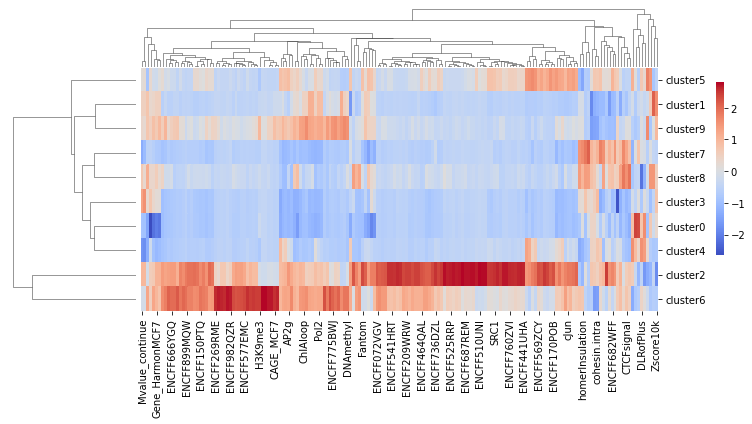

In [19]:
import seaborn as sns
#calculate the mean of each feature for each cluster 
#k=10
heatmap = sns.clustermap(kcenter,cmap = 'coolwarm',figsize=(10, 6),col_cluster=True,z_score=1,
                        cbar_pos=(1, 0.4, 0.01, 0.4))

heatmap.savefig('Kmeans_heatmapAll.eps',dpi=300)

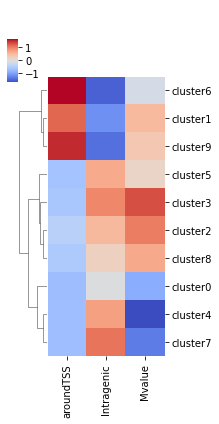

In [24]:
g=sns.clustermap(kcenter[['cohesin.TSS', 'cohesin.intra',"Mvalue_continue"]],cmap = 'coolwarm', 
                 xticklabels=['aroundTSS','Intragenic','Mvalue'], col_cluster=False,z_score=1,figsize=(3, 6),cbar_pos=(0, 0.8, 0.05, 0.1))
g.savefig("Kmeans_heatmap3.eps",dpi=300)
g.savefig("Kmeans_heatmap3.pdf",dpi=300)

In [25]:
kcenter_z = heatmap.data2d
c7 = kcenter_z.loc['cluster7']
c4 = kcenter_z.loc['cluster4']

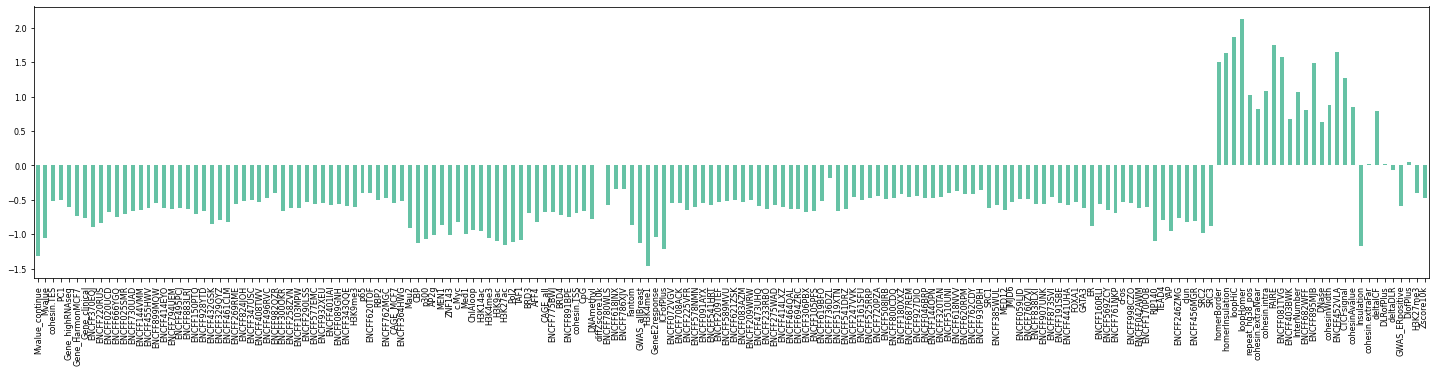

In [40]:
import matplotlib.pyplot as plt
HC = c7.plot(kind="bar",figsize=(25,5),color="#66c2a5")
HC.tick_params(labelsize=8)
hc = HC.get_figure()
hc.savefig('cluster7_HC_bar.eps',dpi=300)

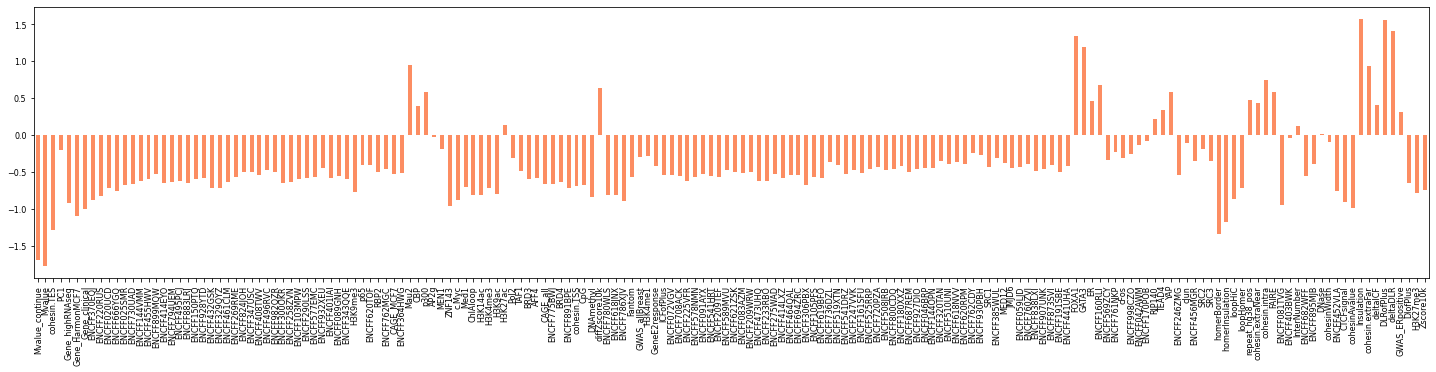

In [39]:
LC=c4.plot(kind="bar",figsize=(25,5),color="#fc8d62")
LC.tick_params(labelsize=8)
lc = LC.get_figure()
lc.savefig('cluster4_LC_bar.eps',dpi=300)

In [144]:
kcenter.columns.values

array(['AFF4', 'AP2g', 'BRD3', 'BRD4', 'CAGE_MCF7', 'CAGE_all', 'CBP',
       'ChIAloop', 'CpG', 'DNase', 'ER', 'FAIRE', 'FOXA1', 'Fantom',
       'GATA3', 'GWAS_ERpositive', 'GWAS_allBreast', 'GeneE2response',
       'Gene_HarmonMCF7', 'Gene_clinical', 'Gene_highRNAseq', 'H3K14ac',
       'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K4me3', 'H3K9ac', 'H3K9me3',
       'JMJD6', 'MED12', 'MEN1', 'Mau2', 'Med1', 'PC1', 'Pol2', 'RBP2',
       'RIP140', 'SRC1', 'SRC2', 'SRC3', 'TAF1', 'TEAD4', 'YAP', 'ZNF143',
       'c.Myc', 'cFos', 'cJun', 'cohesin.TES', 'cohesin.TSS',
       'cohesin.extraFar', 'cohesin.extraNear', 'cohesin.intra',
       'homerBorder', 'loopHiC', 'loopHomer', 'p300', 'p65',
       'repeat_hg38_pos', 'ENCFF020UCD', 'ENCFF025SMR', 'ENCFF042AWM',
       'ENCFF046BRP', 'ENCFF059LJD', 'ENCFF072VGV', 'ENCFF081TVG',
       'ENCFF083AZM', 'ENCFF089GNH', 'ENCFF091AYX', 'ENCFF103MPW',
       'ENCFF105PFS', 'ENCFF144OPN', 'ENCFF144VMM', 'ENCFF150PTQ',
       'ENCFF160RLI', 'ENCFF161SFU',